In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import pyplot as plt

In [13]:
T = 22
dh = 64
K = 10_000
B = 10
N = 8

half_dh = dh // 2

### Rotary RoPE

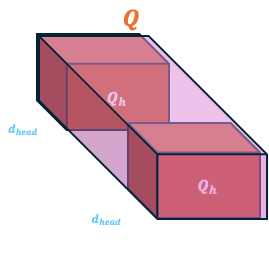

In [8]:
q = torch.rand(B, N, T, dh)
q.shape

torch.Size([10, 8, 22, 64])

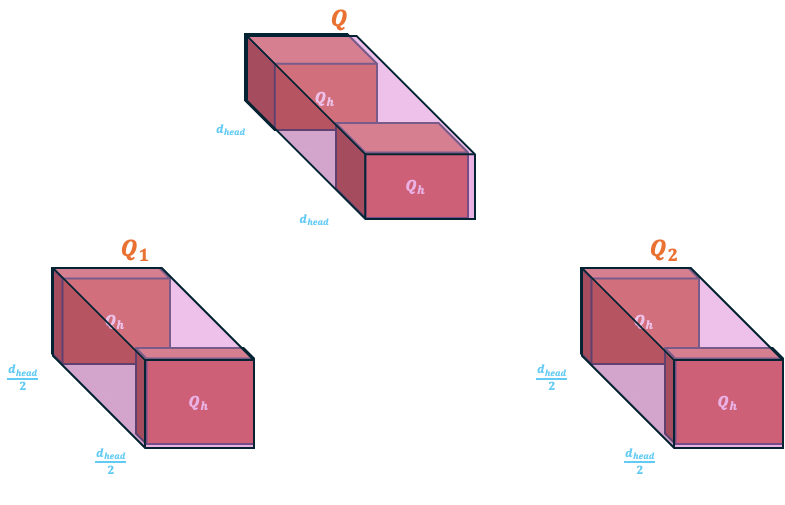

In [ ]:
q1 = q[..., :half_dh]
q2 = q[..., half_dh:]

In [ ]:
q1, q2 = q.split(half_dh, dim=-1)

In [11]:
q1.shape

torch.Size([10, 8, 22, 32])

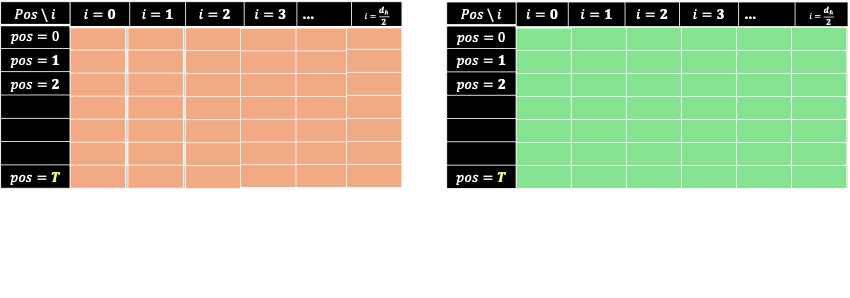

`term`: $k^{2i/d_h}$ ==> $ k^{i/(d_h/2)} $

- $\vec{i} : (1, d_h/2)$
- $\vec{pos} : (T, 1)$


### `angles` = $\frac{pos}{term}$ 
- angles matrix is the relation between position of Token `pos` & embedding entry `i`
- by which the sin & cos being applied upon

$(T, d_h/2)$

In [12]:
pos_idx = torch.arange(T)
dim_idx = torch.arange(half_dh)

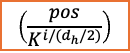

In [18]:
# i/(dh/2)

term = 1 / (K ** (dim_idx / half_dh))

angles = torch.outer(pos_idx, term)

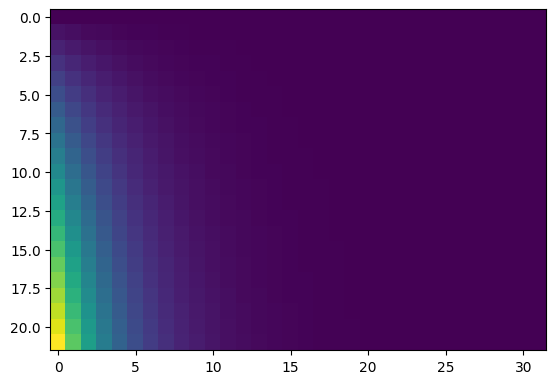

In [19]:
plt.imshow(angles)

In [20]:
# angles
cos_angles = angles.cos()
sin_angles = angles.sin()

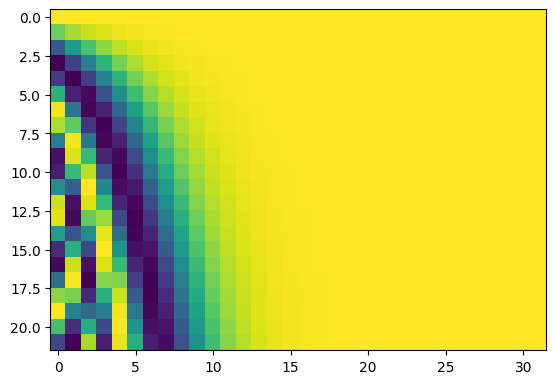

In [22]:
plt.imshow(cos_angles)

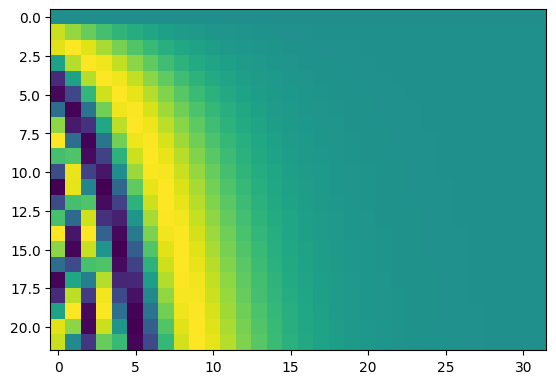

In [23]:
plt.imshow(sin_angles)

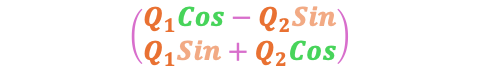

In [25]:
p1 = q1 * cos_angles - q2 * sin_angles
p1.shape

torch.Size([10, 8, 22, 32])

In [26]:
p1 = q1 * cos_angles - q2 * sin_angles
p2 = q1 * sin_angles + q2 * cos_angles

q_rot = torch.cat([p1, p2], dim=-1)

q_rot.shape # B N T dh

torch.Size([10, 8, 22, 64])

In [28]:
(q_rot @ q_rot.transpose(-2, -1)).shape

torch.Size([10, 8, 22, 22])